In [1]:
#export
from rtma.imports import *
from rtma.core import *
from rtma.signal import *
from rtma.fft import *
from rtma.stft import *
from rtma.objects import *

In [2]:
fn = "data/E_octaves_both.wav"
s = Signal(fn)

In [3]:
s.play()

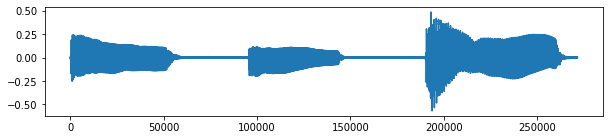

In [4]:
s.plot();

In [5]:
round(s.duration, 2), s.n_samples, s.sample_rate

(5.66, 271522, 48000)

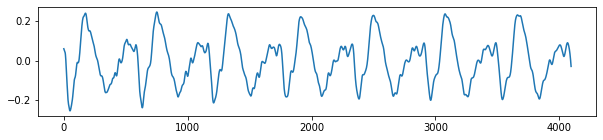

In [8]:
start = 1000
end = start + 4096
s.plot(start=start, end=end)

In [48]:
sma = SineModelAnalysis(s, 
                        fft_size=2048,
                        window_name='hamming',
                        frame_size=2001,
                        hop_size=500,
                        peak_threshold=-60,
                        freq_dev_offset=2,
                        freq_dev_slope=0.02)

In [49]:
sma_frames = list(sma.sine_model_frames)
len(sma_frames)

547

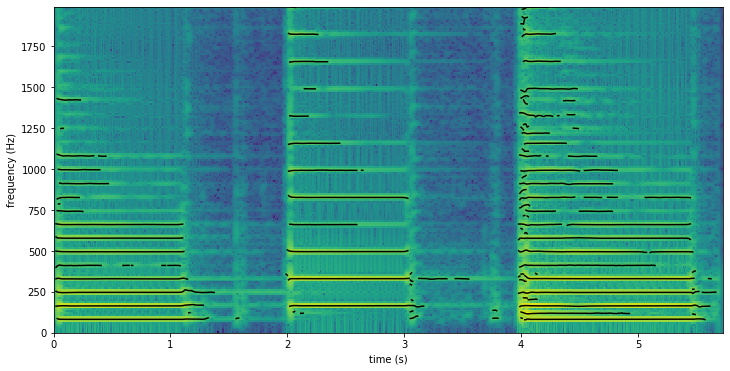

In [55]:
sma.plot_sines(2000)

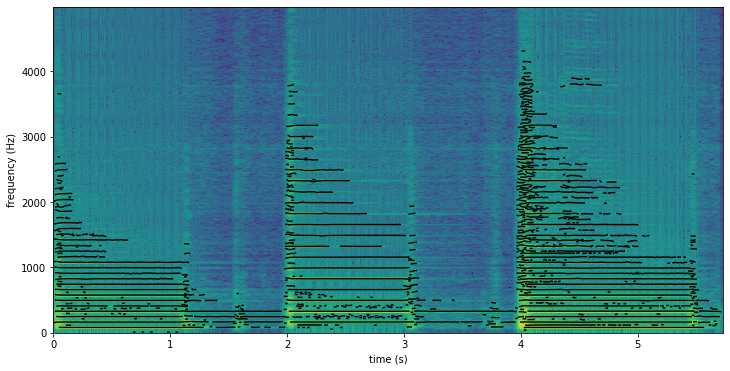

In [63]:
sma = SineModelAnalysis(s, 
                        fft_size=4096,
                        window_name='hamming',
                        frame_size=4001,
                        hop_size=500,
                        peak_threshold=-80,
                        freq_dev_offset=.1,
                        freq_dev_slope=0.01)
sma_frames = list(sma.sine_model_frames)
sma.plot_sines(5000)

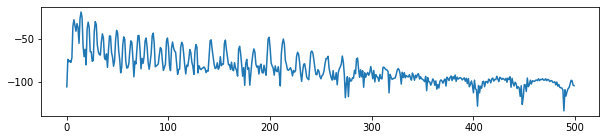

In [84]:
plot(sma_frames[400].peak_frame.magnitudes_db[:500])

In [85]:
mags = sma_frames[400].peak_frame.magnitudes_db

In [87]:
mags.shape

(2049,)

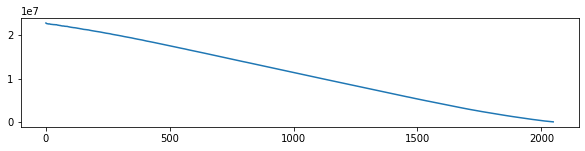

In [89]:
plot(librosa.autocorrelate(mags))

In [90]:
# TODO:
# select only the peaks that are at least 4 bins wide 
# (or 6, or 8, depending on the analysis window)